In [2]:
from numpy import *
import scipy
import matplotlib.pyplot as plt
from CTOF_datafit import ctof_paramfit, eff_unc
import pickle

import pandas as pd

#import selfmade python modules
from pylib.dbData._dbData import dbData
from CTOF_cal import *
from peakshape_functions import *
from CTOF_ion import Ion, iondict, iondict_minimium
from CTOF_iondist import IonDist

#from libsoho.libctof import getionvel
from Libsoho._ctoflv1 import ctoflv1

#import time modules
from time import perf_counter as clock
import datetime as dt

#import peakshape functions
from peakshape_functions import *

In [3]:
def normalfunc(x, mu, sigma):
    return 1/(sigma*sqrt(2*pi))*exp(-(1/2)*((x-mu)/sigma)**2)

def polyfunc(x, a, b, c):
    return a*x**2+b*x+c

ionlist_analyze=["C4+","C5+","C6+","N5+","N6+","N7+","O5+","O6+","O7+","O8+","Ne8+","Mg6+","Mg7+","Mg8+","Mg9+","Mg10+","Si7+","Si8+","Si9+","Si10+","S7+","S8+","S9+","Ca10+","Ca11+","Fe7+","Fe8+","Fe9+","Fe10+","Fe11+","Fe12+","Fe13+"]
#ionlist_analyze=["C4+","C5+","C6+","O5+","O6+","O7+","O8+","Si5+","Si6+","Si7+","Si8+","Si9+","Si10+","Si11+","Fe6+","Fe7+","Fe8+","Fe9+","Fe10+","Fe11+","Fe12+","Fe13+"]
class ctof_abundances(ctof_paramfit):
    def analyze_slowwind_350400(self,ions_plot=ionlist_analyze,velmin_select=None,velmax_select=None): 
        s=open("fitres_slow350400","rb")
        cs=pickle.load(s)
        steps_350400=arange(30,97,1)
        vs_350400=self.analyze_veldist(ionlist=cs[-1],Chi=cs,modelnumber=0,steps=steps_350400,ions_plot=ionlist_analyze,cfracs=[0.61,0.32,0.14],velref=375.,runavg=5,MAX_velmin=250, MAX_velmax=500,stopstep=80, cmult=True,plot_evalrange=True, Xrange=[240,510],Yrange=None,Xrange_log=[110,750],Yrange_log=None,figx=13.9,figy=9,adjust_top=0.57,lgx=-0.038,lgy=1.9,legsize=18,labelsize=20,ticklabelsize=16,vproton=375,figtitle="",savefigure=False,figpath="",figname="test",peakshape="kappa_moyalpar_Easym",plot_errorbars=False,Nboot=1000,plot_steps=False, Plot=True,figformat_autom=True, fitgauss=True,vth_fitguess=30,save_meanvels=False,filepath="", filename="",scale_ions=False)
        self.apply_efficiency_correction(velmin_select,velmax_select)
    def analyze_fastwind_480570(self,ions_plot=ionlist_analyze,velmin_select=None,velmax_select=None): 
        f=open("fitres_fast480570","rb")
        cf=pickle.load(f)
        steps_480570=arange(15,75,1)
        vs_480570=self.analyze_veldist(ionlist=cf[-1],Chi=cf,modelnumber=0,steps=steps_480570,ions_plot=ionlist_analyze,cfracs=[0.61,0.32,0.14],velref=525.,runavg=5,MAX_velmin=400, MAX_velmax=650,stopstep=63, cmult=True,plot_evalrange=True, Xrange=[350,720],Yrange=None,Xrange_log=[210,1150], Yrange_log=None,figx=13.9,figy=9,adjust_top=0.57,lgx=-0.038,lgy=1.9,legsize=18,labelsize=20,ticklabelsize=16,vproton=525,figtitle="",savefigure=False,figpath="",figname="test",peakshape="kappa_moyalpar_Easym",plot_errorbars=False,Nboot=1000,plot_steps=False, Plot=True,figformat_autom=True, fitgauss=True,vth_fitguess=60,save_meanvels=False,filepath="", filename="",scale_ions=False)
        self.apply_efficiency_correction(velmin_select,velmax_select)
    def analyze_slowwind(self,ions_plot=ionlist_analyze,velmin_select=None,velmax_select=None): 
        s=open("fitdata_slowwind","rb")
        cs=pickle.load(s)
        Steps_slow=arange(35,95,1)
        vs=self.analyze_veldist(ionlist=cs[-1],Chi=cs,modelnumber=0,steps=Steps_slow, ions_plot=ionlist_analyze,cfracs=[0.61,0.32,0.14], velref=335.,runavg=3,MAX_velmin=200, MAX_velmax=470, stopstep=90, cmult=True,plot_evalrange=True, Xrange=[270,400],Yrange=None, Xrange_log=[240,560],Yrange_log=None,figx=13.9,figy=9,adjust_top=0.57,lgx=0.1,lgy=1.9, legsize=18,labelsize=20,ticklabelsize=16,vproton=None,figtitle="",savefigure=False,figpath="",
        figname="test",peakshape="kappa_moyalpar_Easym",plot_errorbars=False, Nboot=1000, plot_steps=False,Plot=False,figformat_autom=True, fitgauss=True, vth_fitguess=15, save_meanvels=False, filepath="/Test/",filename="Test", scale_ions=False,save_totalcounts=False, counts_filename="Test_counts")
        self.apply_efficiency_correction(velmin_select,velmax_select)
    def analyze_fastwind(self,ions_plot=ionlist_analyze,velmin_select=None,velmax_select=None): 
        f=open("fitdata_fastwind","rb")
        cf=pickle.load(f)
        Steps_fast=arange(18,75,1)
        vf=self.analyze_veldist(ionlist=cf[-1],Chi=cf,modelnumber=0,steps=Steps_fast,ions_plot=ionlist_analyze,cfracs=[0.61,0.32,0.14],velref=505.,runavg=5,MAX_velmin=400, MAX_velmax=2000,stopstep=68, cmult=True,plot_evalrange=True,Xrange=[350,720],Yrange=None,Xrange_log=[210,1150],Yrange_log=None,figx=13.9,figy=9,adjust_top=0.57,lgx=0.1,lgy=1.9,legsize=18,labelsize=20,ticklabelsize=16,vproton=None,figtitle="",savefigure=False,figpath="",figname="test",peakshape="kappa_moyalpar_Easym",plot_errorbars=False, Nboot=1000,plot_steps=False,Plot=False,figformat_autom=True, fitgauss=True, vth_fitguess=45, save_meanvels=False,filepath="/Test/",filename="Test",scale_ions=False,save_totalcounts=False, counts_filename="Test_counts")
        self.apply_efficiency_correction(velmin_select,velmax_select)

    def mu_and_sigma_plots(self,elem='O',ions_plot=["O6+","O7+","O8+"], yscale_log=True,labelsize=16,norm="max",figx=15, figy=7,save_figure=False,figtitle="test_chargestates"):
            Ioncounts_effcor=[]
            Ioncounts_effcor_unc=[]
            for i,ionname in enumerate(ions_plot):
                j=where(ionname==self.Ions_effcor)[0]
                ioncounts_effcor=self.Counts_effcor[j]
                ioncounts_effcor_unc=self.Counts_effcor_unc[j]
                Ioncounts_effcor.append(ioncounts_effcor)
                Ioncounts_effcor_unc.append(ioncounts_effcor_unc)
            Ioncounts_effcor=array(Ioncounts_effcor)
            Ioncounts_effcor_unc=array(Ioncounts_effcor_unc)
            if norm=="sum":
                Sumcounts=float(sum(Ioncounts_effcor))
                abundances = concatenate([Ioncounts_effcor[i]/Sumcounts for i in arange(len(ions_plot))])
                abundances_unc = concatenate([Ioncounts_effcor_unc[i]/Sumcounts for i in arange(len(ions_plot))])
            elif norm=="max":
                Maxcounts=float(max(Ioncounts_effcor))
                abundances = concatenate([Ioncounts_effcor[i]/Maxcounts for i in arange(len(ions_plot))])
                abundances_unc = concatenate([Ioncounts_effcor_unc[i]/Maxcounts for i in arange(len(ions_plot))])
            else:
                abundances = concatenate([Ioncounts_effcor[i] for i in arange(len(ions_plot))])
                abundances_unc = concatenate([Ioncounts_effcor_unc[i] for i in arange(len(ions_plot))])
            ChiantiData = pd.read_csv("./Data/ChiantiResults/"+elem+"Long.csv")[ions_plot]
            t = 1.e+4*arange(150)+5.e+5
            ratios=zeros_like(t)
            mus=zeros_like(t)
            mus_err=zeros_like(t)
            sigmas=zeros_like(t)
            sigmas_err=zeros_like(t)
            for temperature in range(len(t)):
                if elem == 'O':
                    ratios[temperature] = abundances[1]/abundances[0]
                else:
                    popt, pcov = scipy.optimize.curve_fit(normalfunc, arange(len(ions_plot)), ChiantiData.iloc[temperature])
                    mus[temperature]=popt.tolist()[0]
                    sigmas[temperature]=popt.tolist()[1]
                    mus_err[temperature]=sqrt(pcov[0][0])
                    sigmas_err[temperature]=sqrt(pcov[1][1])
        
            popt, pcov = scipy.optimize.curve_fit(polyfunc, t[45:110], mus[45:110])
            fig, ax = plt.subplots()
            ax.errorbar(t[45:110],mus[45:110],yerr=mus_err[45:110])
            ax.plot(t[45:110],polyfunc(t[45:110], *popt))
            fig.show()

timeframe: [[174, 221]] [0, 1440]
days [174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220]
loading day: 174
loading day: 175
loading day: 176
loading day: 177
loading day: 178
loading day: 179
loading day: 180
loading day: 181
loading day: 182
loading day: 183
loading day: 184
loading day: 185
loading day: 186
loading day: 187
loading day: 188
loading day: 189
loading day: 190
loading day: 191
loading day: 192
loading day: 193
loading day: 194
loading day: 195
loading day: 196
loading day: 197
loading day: 198
loading day: 199
loading day: 200
loading day: 201
loading day: 202
loading day: 203
loading day: 204
loading day: 205
loading day: 206
loading day: 207
loading day: 208
loading day: 209
loading day: 210
loading day: 211
loading day: 212
loading day: 213
loading day: 214
loading day: 215
loading day: 216
loading day: 217
loading day: 218
load

c:\Users\andre\CTOF_CELIAS\CELIAS-CTOF\CTOF_datafit.py:331: RuntimeWarning: invalid value encountered in sqrt
  L=9.42+log(T**(3./2)/n**(1./2))


Initializing Ion C4+: m=12, q=4, atomic number=6, peakshape=kappa_moyalpar_Easym,intensity=1.00
Initializing Ion C5+: m=12, q=5, atomic number=6, peakshape=kappa_moyalpar_Easym,intensity=1.00
Initializing Ion C6+: m=12, q=6, atomic number=6, peakshape=kappa_moyalpar_Easym,intensity=1.00
Initializing Ion N5+: m=14, q=5, atomic number=7, peakshape=kappa_moyalpar_Easym,intensity=1.00
Initializing Ion N6+: m=14, q=6, atomic number=7, peakshape=kappa_moyalpar_Easym,intensity=1.00
Initializing Ion N7+: m=14, q=7, atomic number=7, peakshape=kappa_moyalpar_Easym,intensity=1.00
Initializing Ion O5+: m=16, q=5, atomic number=8, peakshape=kappa_moyalpar_Easym,intensity=1.00
Initializing Ion O6+: m=16, q=6, atomic number=8, peakshape=kappa_moyalpar_Easym,intensity=1.00
Initializing Ion O7+: m=16, q=7, atomic number=8, peakshape=kappa_moyalpar_Easym,intensity=1.00
Initializing Ion O8+: m=16, q=8, atomic number=8, peakshape=kappa_moyalpar_Easym,intensity=1.00
Initializing Ion Ne8+: m=20, q=8, atomic

C:\Users\andre\AppData\Local\Temp/ipykernel_9484/1916597325.py:75: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


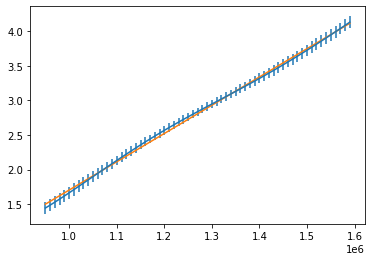

In [4]:
d=ctof_abundances(timeframe=[[174,221]],minute_frame=[0,1440],load_processed_PHAdata=True)
IMAGES_SAVING=False
PlotInLog=False
d.analyze_slowwind(velmin_select=310,velmax_select=360)
d.mu_and_sigma_plots(elem='Fe',ions_plot=['Fe7+','Fe8+','Fe9+','Fe10+','Fe11+','Fe12+'],norm='sum',figx=21,save_figure=IMAGES_SAVING,yscale_log=PlotInLog,figtitle="FeChiantiComparisonFAST")

C:\Users\andre\AppData\Local\Temp/ipykernel_16588/896614552.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\andre\AppData\Local\Temp/ipykernel_16588/896614552.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\andre\AppData\Local\Temp/ipykernel_16588/896614552.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\andre\AppData\Local\Temp/ipykernel_16588/896614552.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


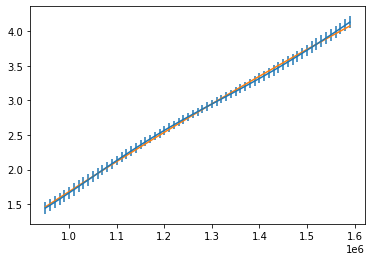

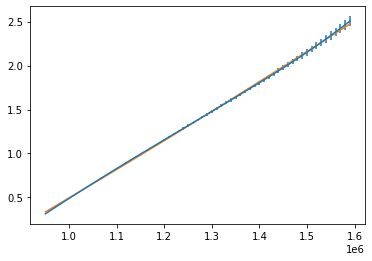

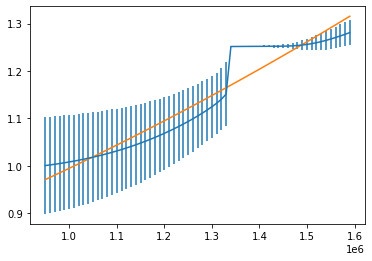

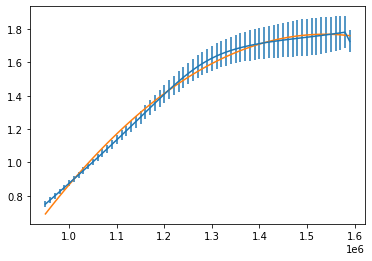

In [33]:
d.mu_and_sigma_plots(elem='Fe',ions_plot=['Fe7+','Fe8+','Fe9+','Fe10+','Fe11+','Fe12+'],norm='sum',figx=21,save_figure=IMAGES_SAVING,yscale_log=PlotInLog,figtitle="FeChiantiComparisonFAST")
d.mu_and_sigma_plots(elem='Si',ions_plot=['Si7+','Si8+','Si9+','Si10+'],norm='sum',figx=21,save_figure=IMAGES_SAVING,yscale_log=PlotInLog,figtitle="SiChiantiComparisonFAST")
d.mu_and_sigma_plots(elem='O',ions_plot=['O5+','O6+','O7+','O8+'],norm='sum',figx=21,save_figure=IMAGES_SAVING,yscale_log=PlotInLog,figtitle="FeChiantiComparisonFAST")
d.mu_and_sigma_plots(elem='C',ions_plot=['C4+','C5+','C6+'],norm='sum',figx=21,save_figure=IMAGES_SAVING,yscale_log=PlotInLog,figtitle="FeChiantiComparisonFAST")

C:\Users\andre\AppData\Local\Temp/ipykernel_8492/4245317636.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\andre\AppData\Local\Temp/ipykernel_8492/4245317636.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


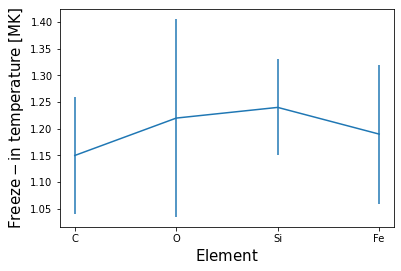

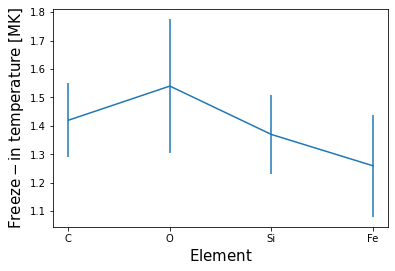

In [6]:
from numpy import *
import matplotlib.pyplot as plt

Temps = [1.15,1.22,1.24,1.19]
TempsError = [0.11,0.37/2,0.09,0.13]
fig, ax = plt.subplots()
ax.errorbar(arange(4),Temps,yerr=TempsError)

ax.set_xticks(arange(4))
ax.set_xticklabels(['C','O','Si','Fe'])
ax.set_xlabel(r"$ \rm{Element}$",fontsize=15)
ax.set_ylabel(r"$ \rm{Freeze-in \ temperature \ [MK]}$"%(), fontsize=15)
ax.set_title(r"$ \rm{Ratio \ temperatures \ in \ Slow \ Wind}$",fontsize=15)
fig.show()
Temps = [1.42,1.54,1.37,1.26]
TempsError = [0.13,0.47/2,0.14,0.18]
fig, ax = plt.subplots()
ax.errorbar(arange(4),Temps,yerr=TempsError)
ax.set_xticks(arange(4))
ax.set_xticklabels(['C','O','Si','Fe'])
ax.set_xlabel(r"$ \rm{Element}$",fontsize=15)
ax.set_ylabel(r"$ \rm{Freeze-in \ temperature \ [MK]}$"%(), fontsize=15)
ax.set_title(r"$ \rm{Ratio \ temperatures \ in \ Fast \ Wind}$",fontsize=15)
fig.show()

C:\Users\andre\AppData\Local\Temp/ipykernel_21332/2172656878.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\andre\AppData\Local\Temp/ipykernel_21332/2172656878.py:98: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


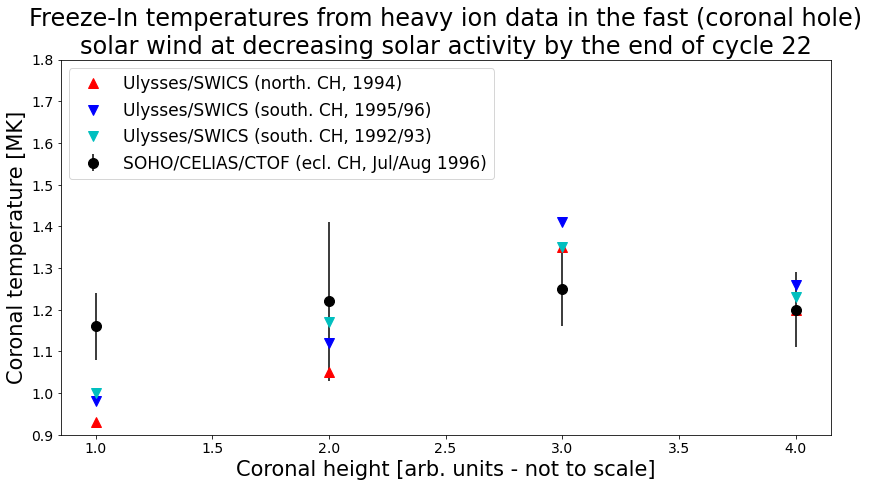

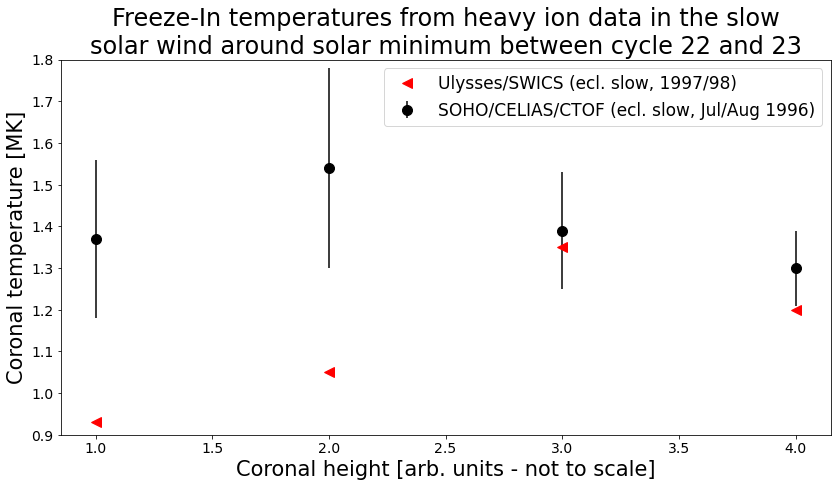

In [31]:
from numpy import *
import matplotlib.pyplot as plt

figx_full=13.8
figx_half=6.8
figy_full=7
figy_half=5


#Coronal Freeze-in Temperatures

#Janitzek&Debrandare: SOHO/CELIAS/CTOF CH in ecliptic (Jul - Aug 1996)
TC_SE=1.16
TO_SE=1.22
TSi_SE=1.25
TFe_SE=1.20
T_SOHO_fast=array([TC_SE,TO_SE,TSi_SE,TFe_SE])
TC_SE_unc=0.08
TO_SE_unc=0.19
TSi_SE_unc=0.09
TFe_SE_unc=0.09
T_SOHO_fast_unc=array([TC_SE_unc,TO_SE_unc,TSi_SE_unc,TFe_SE_unc])


#Steiger: Ulysses/SWICS north CH (Jan - Oct 1994)
TC_UN=0.93
TO_UN=1.05
TSi_UN=1.35
TFe_UN=1.20
T_Steiger_Nfast=array([TC_UN,TO_UN,TSi_UN,TFe_UN])

#Steiger: Ulysses/SWICS south CH (Jul 1995 - Apr 1996)
TC_US=0.98
TO_US=1.12
TSi_US=1.41
TFe_US=1.26
T_Steiger_Sfast=array([TC_US,TO_US,TSi_US,TFe_US])

#Geiss: Ulysses/SWICS south CH (mid 1992 - spring 1993)
TC_USG=1.00
TO_USG=1.17
TSi_USG=1.35
TFe_USG=1.23
T_Geiss_Sfast=array([TC_USG,TO_USG,TSi_USG,TFe_USG])


soldist_arb=array([1,2,3,4])

fig, ax = plt.subplots(1,1,figsize=(figx_full, 0.5*figx_full))
ax.errorbar(soldist_arb,T_SOHO_fast,yerr=T_SOHO_fast_unc,linestyle="None",marker="o",markersize=10,color="k", label="SOHO/CELIAS/CTOF (ecl. CH, Jul/Aug 1996)")
ax.plot(soldist_arb,T_Steiger_Nfast,linestyle="None",marker="^",markersize=10,color="r", label="Ulysses/SWICS (north. CH, 1994)")
ax.plot(soldist_arb,T_Steiger_Sfast,linestyle="None",marker="v",markersize=10,color="b", label="Ulysses/SWICS (south. CH, 1995/96)")
ax.plot(soldist_arb,T_Geiss_Sfast,linestyle="None",marker="v",markersize=10,color="c", label="Ulysses/SWICS (south. CH, 1992/93)")
ax.set_xlabel("Coronal height [arb. units - not to scale]", fontsize=21)
ax.set_ylabel("Coronal temperature [MK]", fontsize=21)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim(0.9,1.8)
ax.legend(loc="upper left",ncol=1,prop={'size': 17})
ax.set_title("Freeze-In temperatures from heavy ion data in the fast (coronal hole)\nsolar wind at decreasing solar activity by the end of cycle 22", fontsize=24)
fig.show()
plt.savefig("%s"%'TempProfileFast')




#######################
#Slow wind

#Janitzek&Debrandare: SOHO/CELIAS/CTOF CH in ecliptic (Jul - Aug 1996)
TC_SE_slow=1.37
TO_SE_slow=1.54
TSi_SE_slow=1.39
TFe_SE_slow=1.30
T_SOHO_slow=array([TC_SE_slow,TO_SE_slow,TSi_SE_slow,TFe_SE_slow])
TC_SE_slow_unc=0.19
TO_SE_slow_unc=0.24
TSi_SE_slow_unc=0.14
TFe_SE_slow_unc=0.09
T_SOHO_slow_unc=array([TC_SE_slow_unc,TO_SE_slow_unc,TSi_SE_slow_unc,TFe_SE_slow_unc])

#Steiger: Ulysses/SWICS north CH (Jul 1997 - Apr 1998)
TC_UMIN=1.34
TO_UMIN=1.52
TSi_UMIN=1.55
TFe_UMIN=1.10
T_Steiger_MINslow=array([TC_UN,TO_UN,TSi_UN,TFe_UN])


fig, ax = plt.subplots(1,1,figsize=(figx_full, 0.5*figx_full))
ax.errorbar(soldist_arb,T_SOHO_slow,yerr=T_SOHO_slow_unc,linestyle="None",marker="o",markersize=10,color="k", label="SOHO/CELIAS/CTOF (ecl. slow, Jul/Aug 1996)")
ax.plot(soldist_arb,T_Steiger_MINslow,linestyle="None",marker="<",color="r",markersize=10, label="Ulysses/SWICS (ecl. slow, 1997/98)")
ax.set_xlabel("Coronal height [arb. units - not to scale]", fontsize=21)
ax.set_ylabel("Coronal temperature [MK]", fontsize=21)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim(0.9,1.8)
ax.legend(loc="upper right",ncol=1,prop={'size': 17})
ax.set_title("Freeze-In temperatures from heavy ion data in the slow\nsolar wind around solar minimum between cycle 22 and 23", fontsize=24)
fig.show()
plt.savefig("%s"%'TempProfileSlow')
